In [1]:
from pathlib import Path
import requests

DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"

PATH.mkdir(parents=True, exist_ok=True)

URL = "https://github.com/pytorch/tutorials/raw/main/_static/"
FILENAME = "mnist.pkl.gz"

if not (PATH / FILENAME).exists():
        content = requests.get(URL + FILENAME).content
        (PATH / FILENAME).open("wb").write(content)

In [3]:
import pickle
import gzip

with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
        ((X_train, y_train), (X_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

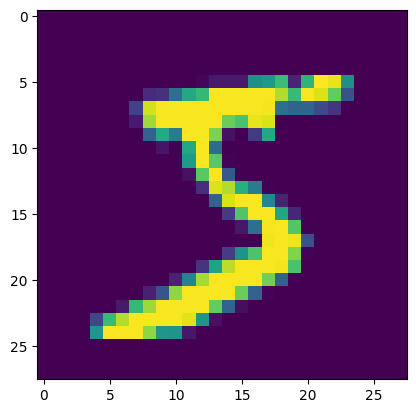

In [5]:
import matplotlib.pyplot as plt 
plt.imshow(X_train[0].reshape((28,28)))

In [6]:
# Create PyTorch tensors
import torch

X_train, y_train, X_valid, y_valid = map(torch.tensor, (X_train, y_train, X_valid, y_valid))
n, c = X_train.shape
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

(torch.Size([50000, 784]),
 torch.Size([50000]),
 torch.Size([10000, 784]),
 torch.Size([10000]))

In [18]:
import math

weights = torch.rand(784, 10)/math.sqrt(784)    # Xavier Initialization
weights.requires_grad_()    # Set requires_grad=True after initialization because we don't need the initializatio step in tracked ops
bias = torch.zeros(10, requires_grad=True)

In [35]:
def log_softmax(x):
    # print(x.shape)
    return x - x.exp().sum(-1).log().unsqueeze(-1)

def model(xb):  # Only output layer (Hence it will act like a Logistic Regression model)
    # print(xb.shape)
    return log_softmax(xb @ weights + bias)

In [36]:
bs = 64
xb = X_train[0:bs]  # first batch
print(xb.shape)
preds = model(xb)
preds.shape

torch.Size([64, 784])


torch.Size([64, 10])

In [37]:
# Loss function
def nll(input ,target):
    # print(input.shape, target.shape)
    return -input[range(target.shape[0]), target].mean()

loss_fn = nll

In [38]:
yb = y_train[0:bs]
print(loss_fn(preds, yb))

tensor(0.2283, grad_fn=<NegBackward0>)


In [43]:
from IPython.core.debugger import set_trace

lr = 0.5  
epochs = 20  

for epoch in range(epochs):
    for i in range((n - 1) // bs + 1):
        #         set_trace()
        start_i = i * bs
        end_i = start_i + bs
        xb = X_train[start_i:end_i]
        yb = y_train[start_i:end_i]
        pred = model(xb)
        loss = loss_fn(pred, yb)

        loss.backward()
        with torch.no_grad():
            weights -= weights.grad * lr
            bias -= bias.grad * lr
            weights.grad.zero_()
            bias.grad.zero_()

In [44]:
def accuracy(out, yb):
    preds = torch.argmax(out, dim=1)
    return (preds == yb).float().mean()

In [45]:
print(loss_fn(model(xb), yb), accuracy(model(xb), yb))

tensor(0.0501, grad_fn=<NegBackward0>) tensor(1.)
